# Bike Rides and the Poisson Model

To help the urban planners, you are called to model the daily bike rides in NYC using [this dataset](https://gist.github.com/sachinsdate/c17931a3f000492c1c42cf78bf4ce9fe/archive/7a5131d3f02575668b3c7e8c146b6a285acd2cd7.zip).  The dataset contains date, day of the week, high and low temp, precipitation and bike ride couunts as columns. 



## Maximum Likelihood I 
 
The obvious choice in distributions is the [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution) which depends only on one parameter, λ, which is the average number of occurrences per interval. We want to estimate this parameter using Maximum Likelihood Estimation.

Implement a Gradient Descent algorithm from scratch that will estimate the Poisson distribution according to the Maximum Likelihood criterion. Plot the estimated mean vs iterations to showcase convergence towards the true mean. 

References: 

1. [This blog post](https://towardsdatascience.com/the-poisson-process-everything-you-need-to-know-322aa0ab9e9a). 

2. [This blog post](https://towardsdatascience.com/understanding-maximum-likelihood-estimation-fa495a03017a) and note the negative  log likelihood function.  


the final lambda =  2680.1644492151895


Text(0.5, 1.0, 'Estimated Mean vs Iterations')

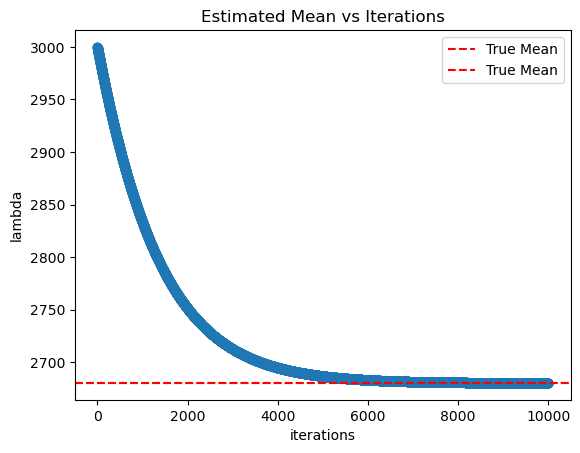

In [203]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as pl


#read file
df = pd.read_csv('/Users/waynewang/Downloads/nyc_bb_bicyclist_counts.csv',usecols=['BB_COUNT'])

#convert dateframe to numpy array
arr = df.to_numpy()

#size of the data
n = len(arr)


#lambda in each iteration
iters = []

#iteration #
num = []


#calculate the gradient of a lambda
def gradient(lamb,data):
    return -np.sum(data/lamb - 1)

#optimize lambda
def gradient_descent(data, max_iter = 10000, learning_rate = 0.01):
    
    #initiliaze lambda1
    lambda1 = 3000
    
    #iterate for max_iters
    for i in range(max_iter):
        iters.append(lambda1)
        
        #gradient of current lambda
        d_lambda1 = gradient(lambda1,data)
        
        #descent
        lambda1 -= learning_rate*d_lambda1
        
        num.append(i)
    return lambda1
        

       
final_lambda = gradient_descent(arr)
print('the final lambda = ',final_lambda)
pl.scatter(num,iters)
pl.axhline(y=np.mean(arr), color='r', linestyle='--', label='True Mean')
pl.axhline(y=np.mean(arr), color='r', linestyle='--', label ='True Mean')
pl.xlabel('iterations')
pl.ylabel('lambda')
pl.legend()
pl.title("Estimated Mean vs Iterations")


## Maximum Likelihood II

A colleague of yours suggest that the parameter $\lambda$ must be itself dependent on the weather and other factors since people bike when its not raining. Assume that you model $\lambda$ as 

$$\lambda_i = \exp(\mathbf w^T \mathbf x_i)$$

where $\mathbf x_i$ is one of the example features and $\mathbf w$ is a set of parameters. 

Train the model with SGD with this assumption and compare the MSE of the predictions with the `Maximum Likelihood I` approach. 

You may want to use [this partial derivative of the log likelihood function](http://home.cc.umanitoba.ca/~godwinrt/7010/poissonregression.pdf)

The average value of lambda:  2625.3146114737997
Final lambda:  1.4215755734121043e-10


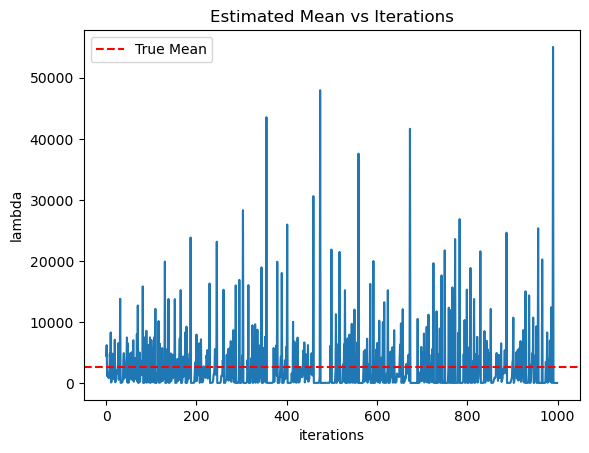

In [204]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as pl
import math
import random

#load data
dfx = pd.read_csv('/Users/waynewang/Downloads/nyc_bb_bicyclist_counts.csv',usecols=['HIGH_T','LOW_T', 'PRECIP'])
dfy = pd.read_csv('/Users/waynewang/Downloads/nyc_bb_bicyclist_counts.csv',usecols=['BB_COUNT'])

#convert dateframes to np arrays
X = dfx.to_numpy()
Y = dfy.to_numpy()
Y = Y.reshape(Y.shape[0],1)

#add augmented column for X
poly = PolynomialFeatures(1)
X = poly.fit_transform(X)

#the size of the dataset
N = X.shape[0]

#gradient with respect to w
def gradient2(w,x_i,y_i):
    lambda1 = np.exp(np.dot(x_i, w))
    residuals = y_i - lambda1
    return (y_i - lambda1 )*x_i

#lambda in each iteration
iters = []

#iteration #
num = []

#gradient to optimize w
def gradient_descent2(X, Y, max_iter = 1000, learning_rate = 0.0000001):
    w = np.array([.1,.1,.1,.1])
    w.reshape(w.shape[0],1)
    for i in range(max_iter):
        #print("iter", i)
        
        #pick a sample
        k = i%N
        x_i = X[k, :]
        #print("x_i: ",x_i)
        y_i = Y[k, :]
        
        
        #print("y_i: ",y_i)
        #print("w:",w)
        #print('wTx: ',x_i.dot(w))
        #print('lambda: ',np.exp(x_i.dot(w)))
        
        #add the current lambda
        iters.append(np.exp(x_i.dot(w)))
        
        #gradient of w
        d_w = gradient2(w,x_i,y_i)
        #print("d_w: ",d_w)
        
        #descent
        w += learning_rate*d_w
        #print('------------')
        
        #add # of iterations
        num.append(i)
    return w

final_w = gradient_descent2(X,Y) 




pl.plot(num,iters)
pl.axhline(y=np.mean(arr), color='r', linestyle='--', label ='True Mean')
pl.xlabel('iterations')
pl.ylabel('lambda')
pl.legend()
pl.title("Estimated Mean vs Iterations")
print("The average value of lambda: ", np.mean(iters))
print("Final lambda: ", iters[-1])


    




Analysis:

The average of value of lambda in the 1000 iterations is 2625.3146114737997, which is close to the final lambda in the previous question, 2680.1644492151895. The closeness between the two numbers indicates that the stochastic gradient descent is converging to the true mean, which is also shown in the graph in which most values lie around the True Mean.

The lambda in the last iteration 1.4215755734121043e-10 shows that stochastic gradient descent usually lacks the stability and accuray that a complete gradient descent has.